In [11]:
import pandas
import matplotlib.pyplot as plt

In [2]:
pandas.__version__

'0.24.2'

This data is taken from Kaggle Titanic competition.

This data represents list of Titanic passengers and their information.

In [61]:
# Reading data with pandas
data = pandas.read_csv('./data/train.csv')

In [4]:
# Print out top 5 rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df = data['Survived']

In [14]:
df.shape

(891,)

In [62]:
# Get information about data fields
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
num_survived = df.sum()
num_not_survived = df.count() - num_survived

In [20]:
print(num_survived, num_not_survived)

342 549


In [34]:
# Locating information by index
data.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [35]:
data.iloc[99]

PassengerId                  100
Survived                       0
Pclass                         2
Name           Kantor, Mr. Sinai
Sex                         male
Age                           34
SibSp                          1
Parch                          0
Ticket                    244367
Fare                          26
Cabin                        NaN
Embarked                       S
Name: 99, dtype: object

In [37]:
# Fare mean value
fare_mean = data['Fare'].mean()

In [39]:
fare_mean

32.204207968574636

In [42]:
# Number of entries where fare price is above average

data.loc[data['Fare']> fare_mean, :].count()

PassengerId    211
Survived       211
Pclass         211
Name           211
Sex            211
Age            183
SibSp          211
Parch          211
Ticket         211
Fare           211
Cabin          139
Embarked       209
dtype: int64

In [45]:
# Getting number of survived and not survived passengers
num_sur = data.loc[data['Survived'] == 1, ['Survived']].count()
num_n_sur = data.loc[data['Survived'] == 0, ['Survived']].count()

print(num_sur, num_n_sur)

Survived    342
dtype: int64 Survived    549
dtype: int64


<BarContainer object of 2 artists>

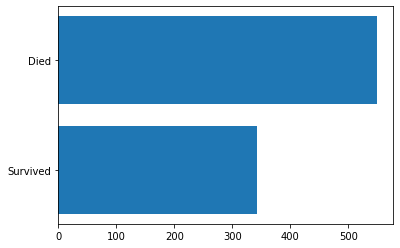

In [60]:
# Plotting graph with information about Survived passengers

fit, ax = plt.subplots()
group_names = ('Survived', 'Died')
group_values = (num_sur['Survived'], num_n_sur['Survived'])
ax.barh(group_names, group_values)

In [75]:
# Average age of Survived passengers by Sex

data.groupby(['Survived', 'Sex'])[['Age']].mean()

Age
Survived Sex              
0        female  25.046875
         male    31.618056
1        female  28.847716
         male    27.276022

In [81]:
info = data.groupby(['Sex', 'Survived'])['Sex'].count()

In [90]:
info

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

<BarContainer object of 2 artists>

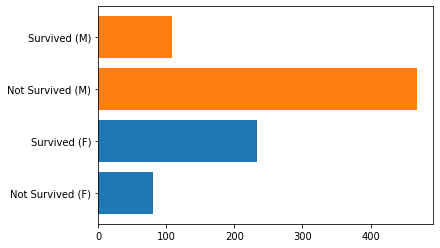

In [93]:
group_f = ['Not Survived (F)', 'Survived (F)']
group_m = ['Not Survived (M)', 'Survived (M)']
female_values = info[0: 2]

male_values = info[2: 4]

fit, ax = plt.subplots()
ax.barh(group_f, female_values)
ax.barh(group_m, male_values)